<a href="https://colab.research.google.com/github/pinkisharma1984/Capstone/blob/master/Capstone_ML_DiseasePrediction_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DSC672 
### Group 4
### Project: Disease Prediction
### Umiama Khurshid Ahmad, Shruti Shah and Pinki Sharma


### Project Description : 
Our aim for this project is to create a platform that can help doctors in disease diagnosis. We belive our system will help doctors to aid thier decision-making abilities for disease diagnosis.

In [ ]:
%pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install prince

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


**Import Libraries**

In [ ]:
#Standard Imports
import pandas as pd
import numpy as np
import prince 
#For vizualtions
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For Flask
import os
import pickle 

### These are the packages we used

In [ ]:
#For transformations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn import preprocessing

# Modeling Evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# To run flask
from flask import Flask, render_template, request

**Here are what the columns represent:**

- Disease (categorical) : name of the diseases
- Disease_CUI (numeric) : disease id 
- Symptoms (categorical) : name of the symptoms 
- Symptoms_CUI (numeric) : symptom id
- Weight (numeric) : weight of the person in lbs
- Height (numeric) : hight of the person in cm
- Intensity (categorical ) : how intense is the pain (low, medium, high)
- Severity (categorical) : severity of the symptoms (low, medium, high)
- Age (numeric) : age of the person
- Gender (categorical) : gender of the person 
- BMI_Level (numeric) : BMI level of the person
- Region (categorical) : what part of the region does the person belongs to
- Season (categorical) : season(summer, winter,fall)


### Get the Data
#### Use pandas to read in the datasets as a dataframe.

In [ ]:
df = pd.read_csv("OHAS_Dataset.csv")

In [ ]:
#first look of Dataset 
display(df.sample(5))

Disease Disease_CUI                  Symptoms  \
1834                  suicide attempt    C3888977  halluci162tions auditory   
2115                   overload fluid    C0085669                drowsiness   
1750                         delusion    C0020258                 catatonia   
363   malig162nt neoplasm of prostate    C0023788               orthostasis   
910                  biliary calculus    C0011848                 apyrexial   

     Symptom_CUI  Weight  Height Intensity Severity  Age  Gender  BMI_Level  \
1834    C0028081     114     162       low     high   49    male     26.125   
2115    C1706559     144     162    medium   medium   17  female     25.850   
1750    C0040264      56     162       low     high   21    male     27.835   
363     C0340464     163     198    medium     high   19  female     26.400   
910     C0032617      61     173       low   medium   23    male     28.310   

         Region  Season  
1834  southeast  Summer  
2115  southeast  Summer  
1750  southeast  Summer  
363   southwest  Summer  
910   northwest  Summer

In [ ]:
df.shape

(2129, 13)

The dataset has 2129 rows and 13 columns.

#### Checking the data and investigating the column types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Disease      2129 non-null   object 
 1   Disease_CUI  2119 non-null   object 
 2   Symptoms     2127 non-null   object 
 3   Symptom_CUI  2129 non-null   object 
 4   Weight       2129 non-null   int64  
 5   Height       2129 non-null   int64  
 6   Intensity    2127 non-null   object 
 7   Severity     2128 non-null   object 
 8   Age          2129 non-null   int64  
 9   Gender       2129 non-null   object 
 10  BMI_Level    2129 non-null   float64
 11  Region       2129 non-null   object 
 12  Season       2129 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 216.4+ KB


Dataset has 6 categorical data and 4 numeric data and target variable(Disease) multiclass label categorical variable. Disease_CUI and Symptom_CUI is unique ID are each disease and symptoms. 

In [ ]:
df.columns

Index(['Disease', 'Disease_CUI', 'Symptoms', 'Symptom_CUI', 'Weight', 'Height',
       'Intensity', 'Severity', 'Age', 'Gender', 'BMI_Level', 'Region',
       'Season'],
      dtype='object')

In [ ]:
df.Disease.unique() #unique diseases

array(['influenza', 'gastritis', 'hypercholesterolemia', 'epilepsy',
       'insufficiency re162l', 'dehydration', 'hypothyroidism',
       'hernia hiatal', 'fibroid tumor', 'deglutition disorder',
       'osteoporosis', 'chronic alcoholic intoxication', 'asthma',
       'sepsis (invertebrate)', 'paranoia', 'ileus', 'neoplasm',
       'obesity morbid', 'primary malig162nt neoplasm', 'failure heart',
       'malig162nt neoplasm of breast', 'tonic-clonic epilepsy',
       'transient ischemic attack', 'malig162nt neoplasm of prostate',
       'embolism pulmo162ry', 'tricuspid valve insufficiency',
       'respiratory failure', 'degenerative polyarthritis', 'aphasia',
       'neoplasm metastasis', 'malig162nt tumor of colon', 'lymphoma',
       'anemia', 'chronic obstructive airway disease',
       'sickle cell anemia', 'coro162ry arteriosclerosis',
       'cholecystitis', 'psychotic disorder', 'thrombus',
       'chronic kidney failure', 'depressive disorder',
       'myocardial infarctio

In [ ]:
df.Symptoms.unique().size 

405

There are about 405 unique symptoms. 

#### Replacing "162" into "na" for both Symptoms and Disease

In [ ]:
# replacing "162" into "na" for symptoms
df['Symptoms'].replace('\d+','na',inplace=True,regex=True)
df

Disease Disease_CUI        Symptoms Symptom_CUI  Weight  \
0              influenza    C0162565  uncoordination    C0039239      68   
1              influenza    C0162565           fever    C0000737      68   
2              influenza    C0162565  pleuritic pain    C0235704      68   
3              influenza    C0162565         snuffle    C0030554      68   
4              influenza    C0162565     throat sore    C0030552      68   
...                  ...         ...             ...         ...     ...   
2124  migraine disorders    C0020532       dizziness    C0005959      61   
2125  migraine disorders    C0020532        numbness    C0031256      61   
2126  migraine disorders    C0020532          nausea    C0014591      61   
2127  migraine disorders    C0020532           fever    C0025323      61   
2128  migraine disorders    C0020532    splenomegaly    C0015967      61   

      Height Intensity Severity  Age  Gender  BMI_Level     Region  Season  
0        180      high   medium   24  female     27.900  southwest  Summer  
1        170       low   medium   23    male     33.770  southeast  Summer  
2        162       low      low   24    male     33.000  southeast  Summer  
3        162      high   medium   34    male     22.705  northwest  Summer  
4        185       low     high   21    male     28.880  northwest  Winter  
...      ...       ...      ...  ...     ...        ...        ...     ...  
2124     162      high     high   20    male     38.170  northwest  Summer  
2125     173       low      low   20  female     36.860  northeast  Summer  
2126     168      high     high   24  female     32.395  southwest  Winter  
2127     168    medium   medium   17    male     42.750  southeast  Winter  
2128     168      high     high   17    male     25.080  northeast  Winter  

[2129 rows x 13 columns]

In [ ]:
#replacing "162" from word into "na" for Disease column
df['Disease'].replace('\d+','na',inplace=True,regex=True)
df

Disease Disease_CUI        Symptoms Symptom_CUI  Weight  \
0              influenza    C0162565  uncoordination    C0039239      68   
1              influenza    C0162565           fever    C0000737      68   
2              influenza    C0162565  pleuritic pain    C0235704      68   
3              influenza    C0162565         snuffle    C0030554      68   
4              influenza    C0162565     throat sore    C0030552      68   
...                  ...         ...             ...         ...     ...   
2124  migraine disorders    C0020532       dizziness    C0005959      61   
2125  migraine disorders    C0020532        numbness    C0031256      61   
2126  migraine disorders    C0020532          nausea    C0014591      61   
2127  migraine disorders    C0020532           fever    C0025323      61   
2128  migraine disorders    C0020532    splenomegaly    C0015967      61   

      Height Intensity Severity  Age  Gender  BMI_Level     Region  Season  
0        180      high   medium   24  female     27.900  southwest  Summer  
1        170       low   medium   23    male     33.770  southeast  Summer  
2        162       low      low   24    male     33.000  southeast  Summer  
3        162      high   medium   34    male     22.705  northwest  Summer  
4        185       low     high   21    male     28.880  northwest  Winter  
...      ...       ...      ...  ...     ...        ...        ...     ...  
2124     162      high     high   20    male     38.170  northwest  Summer  
2125     173       low      low   20  female     36.860  northeast  Summer  
2126     168      high     high   24  female     32.395  southwest  Winter  
2127     168    medium   medium   17    male     42.750  southeast  Winter  
2128     168      high     high   17    male     25.080  northeast  Winter  

[2129 rows x 13 columns]

In [ ]:
#How many dieases with frequency -- maybe we can search on top ones and make others column of those which has frequency less
df.groupby('Disease').count().reset_index()

Disease  Disease_CUI  Symptoms  Symptom_CUI  \
0                    Alzheimer's disease           18        18           18   
1                                    HIV           15        14           15   
2         Pneumocystis carinii pneumonia           18        18           18   
3               accident cerebrovascular            8         8            8   
4    acquired immuno-deficiency syndrome           15        14           15   
..                                   ...          ...       ...          ...   
143                tonic-clonic seizures           17        17           17   
144            transient ischemic attack           17        17           17   
145        tricuspid valve insufficiency           10        10           10   
146                         ulcer peptic           12        12           12   
147          upper respiratory infection           28        28           28   

     Weight  Height  Intensity  Severity  Age  Gender  BMI_Level  Region  \
0        18      18         18        18   18      18         18      18   
1        15      15         15        15   15      15         15      15   
2        18      18         18        18   18      18         18      18   
3         8       8          8         8    8       8          8       8   
4        15      15         15        15   15      15         15      15   
..      ...     ...        ...       ...  ...     ...        ...     ...   
143      17      17         17        17   17      17         17      17   
144      17      17         17        17   17      17         17      17   
145      10      10         10        10   10      10         10      10   
146      12      12         12        12   12      12         12      12   
147      28      28         28        28   28      28         28      28   

     Season  
0        18  
1        15  
2        18  
3         8  
4        15  
..      ...  
143      17  
144      17  
145      10  
146      12  
147      28  

[148 rows x 13 columns]

In total of 148 diseases

In [ ]:
print('Number diseases:', df.Disease.nunique())
df.groupby('Disease').size().sort_values(ascending = False)

Number diseases: 148


Disease
upper respiratory infection    28
bipolar disorder               28
psychotic disorder             25
malignant neoplasms            25
anxiety state                  24
                               ..
accident cerebrovascular        8
failure heart congestive        7
migraine disorders              7
kidney disease                  6
decubitus ulcer                 3
Length: 148, dtype: int64

upper respiratory infection    28
bipolar disorder               28
psychotic disorder             25
malig162nt neoplasms           25
anxiety state

# Data Visualization 

<AxesSubplot:xlabel='count', ylabel='Intensity'>

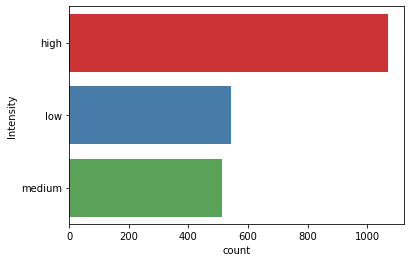

In [ ]:
sns.countplot(y='Intensity', data=df, palette="Set1")

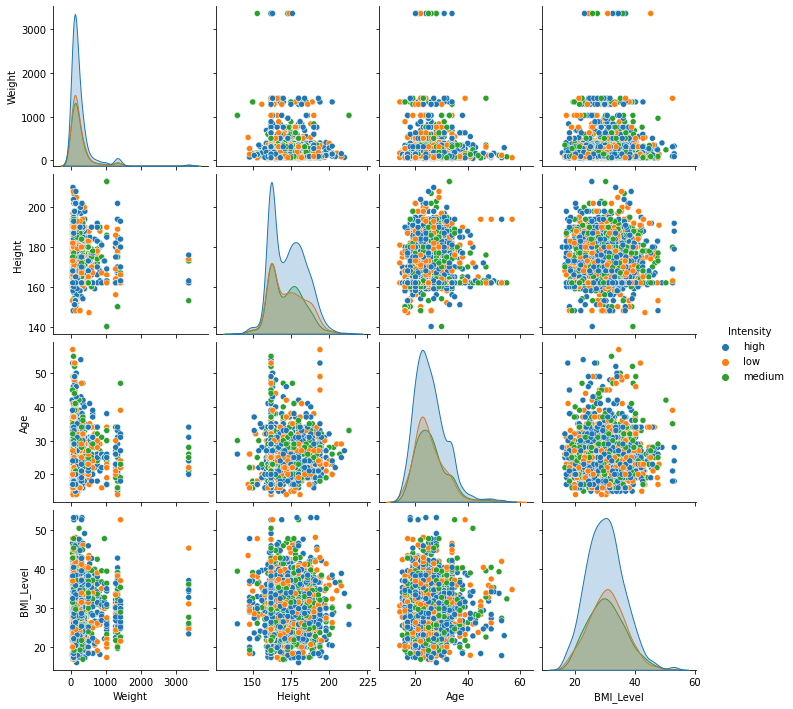

In [ ]:
df_pairplot = sns.pairplot(df,hue='Intensity')

From the graph above we can visualise the intensity of diseases based upon other varibles, we can examine that low and medium intensity are pretty close by but the highest intensity is with abnormal BMI levels, reflecting the age being lower (higher weight)

<AxesSubplot:xlabel='Intensity', ylabel='BMI_Level'>

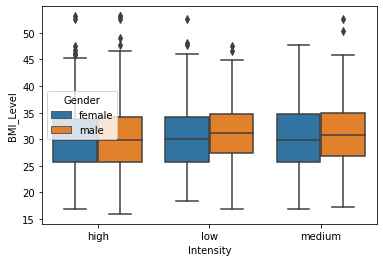

In [ ]:
#sns.stripplot(x='Intensity', y= 'BMI_Level', hue='Gender',data = df,jitter = True)
sns.boxplot(x='Intensity',y='BMI_Level',data=df,hue='Gender')

In [ ]:
print('Number diseases:', df.Disease.nunique())
df.groupby('Disease').size().sort_values(ascending = False)

Number diseases: 148


Disease
upper respiratory infection    28
bipolar disorder               28
psychotic disorder             25
malignant neoplasms            25
anxiety state                  24
                               ..
accident cerebrovascular        8
failure heart congestive        7
migraine disorders              7
kidney disease                  6
decubitus ulcer                 3
Length: 148, dtype: int64

In [ ]:
df_copy = pd.read_csv('OHAS_Dataset.csv')
top_5 = ['upper respiratory infection','psychotic disorder','chronic kidney failure',\
          'malignant neoplasms', 'bipolar disorder','anxiety state']

# make a new column with duplicated data
df_copy['Disease'] = df_copy['Disease'].copy()

# replace all specialties not in top 10 with 'Other' category
df_copy.loc[~df_copy.Disease.isin(top_5),'Disease'] = 'Other'

<AxesSubplot:xlabel='Disease', ylabel='Age'>

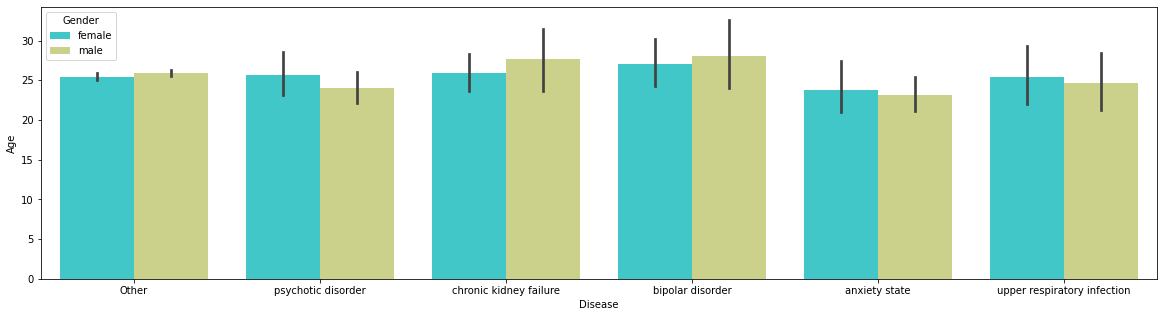

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Disease',y='Age',data=df_copy, palette='rainbow', hue='Gender')

General distribution of Age and BMI in order to see the variations of these two sepratelay 

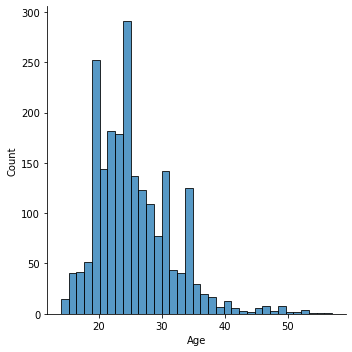

In [ ]:
sns.displot(df.Age)

The is a left skwed plot, with mostly data of ages 20 - 30. We also have data of teenages and snior citizens

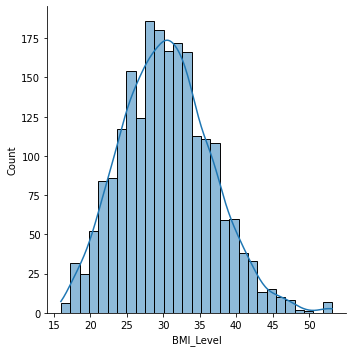

In [ ]:
sns.displot(df.BMI_Level,kde=True)

The healthy bmi level is between 19 to 21. We can exmine an obesity level as BMI is greater than 25 for majority of the data, its somewhat normaily distributed 

- All the dieases to people older than 40 
- Which dieases has symptoms of fever 
- High intensity to male and females ratio 
- What are the common dieases with ibnormal BMI and have high severity to older age

In [ ]:
dieases_on_older_people = df.loc[(df_copy['Age'] > 40)]


In [ ]:
dflistSymptoms = df['Symptoms'].str.split()
diseases_wd_fever = df.loc[df['Symptoms'] == 'fever']
diseases_wd_fever['Disease']

1                                 influenza
78                              dehydration
141                           fibroid tumor
199                   sepsis (invertebrate)
387           tricuspid valve insufficiency
451                                lymphoma
583                  chronic kidney failure
644                 infection urinary tract
734                         decubitus ulcer
798                     Alzheimer's disease
873                               hepatitis
928     acquired immuno-deficiency syndrome
1069                         diverticulitis
1088                        spasm bronchial
1174                          osteomyelitis
1217                         pyelonephritis
1227                         pyelonephritis
1405                      thrombocytopaenia
1429                              exanthema
1468                              infection
1484                             cellulitis
1502                     lymphatic diseases
1516                        gast

In [ ]:

sr_people_with_high_intensity = df.loc[(df['Age'] < 40) & (df['Severity'] == 'high') & (df['Intensity'] == 'high')]
print('Number diseases:', sr_people_with_high_intensity.Disease.nunique())
#sr_people_with_high_intensity.groupby('Disease').size().sort_values(ascending = False)


Number diseases: 145


In [ ]:
top_5 = ['upper respiratory infection','psychotic disorder','chronic kidney failure',\
          'malignant neoplasms', 'malignant neoplasm of prostate']

# make a new column with duplicated data
sr_people_with_high_intensity['Disease'] = sr_people_with_high_intensity['Disease'].copy()

# replace all specialties not in top 10 with 'Other' category
sr_people_with_high_intensity.loc[~sr_people_with_high_intensity.Disease.isin(top_5),'Disease'] = 'Other'

C:\Users\its_u\AppData\Local\Temp/ipykernel_17856/2362128438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_people_with_high_intensity['Disease'] = sr_people_with_high_intensity['Disease'].copy()


In [ ]:
sr_people_with_high_intensity.groupby('Disease').size()

Disease
Other                             478
chronic kidney failure              8
malignant neoplasm of prostate      8
malignant neoplasms                 8
psychotic disorder                  8
upper respiratory infection         9
dtype: int64

<AxesSubplot:xlabel='BMI_Level', ylabel='Disease'>

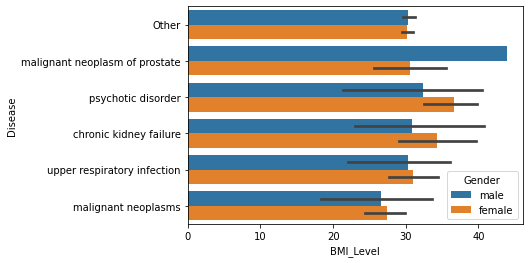

In [ ]:
sns.barplot(y='Disease',x='BMI_Level',hue='Gender',data=sr_people_with_high_intensity)

### Checking for any missing values

In [ ]:
#checking for Nas
df.isna().sum()

Disease         0
Disease_CUI    10
Symptoms        2
Symptom_CUI     0
Weight          0
Height          0
Intensity       2
Severity        1
Age             0
Gender          0
BMI_Level       0
Region          0
Season          0
dtype: int64

We can see that our dataset is not clean and has missing values in columns: Intensity, Severity, Symptoms, Disease_CUI

**Removing the missing values**

In [ ]:
#adjusting Nas, - > as its not numeric we will remove these for now. 
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Disease        0
Disease_CUI    0
Symptoms       0
Symptom_CUI    0
Weight         0
Height         0
Intensity      0
Severity       0
Age            0
Gender         0
BMI_Level      0
Region         0
Season         0
dtype: int64

In [ ]:
df.shape

(2114, 13)

#### Drooping insignificant columns: Region, Symtom_CUI, Disease_CUI and Season

In [ ]:
df = df.drop(['Region', 'Symptom_CUI', 'Disease_CUI', 'Season'], axis=1)
df

Disease        Symptoms  Weight  Height Intensity Severity  \
0              influenza  uncoordination      68     180      high   medium   
1              influenza           fever      68     170       low   medium   
2              influenza  pleuritic pain      68     162       low      low   
3              influenza         snuffle      68     162      high   medium   
4              influenza     throat sore      68     185       low     high   
...                  ...             ...     ...     ...       ...      ...   
2124  migraine disorders       dizziness      61     162      high     high   
2125  migraine disorders        numbness      61     173       low      low   
2126  migraine disorders          nausea      61     168      high     high   
2127  migraine disorders           fever      61     168    medium   medium   
2128  migraine disorders    splenomegaly      61     168      high     high   

      Age  Gender  BMI_Level  
0      24  female     27.900  
1      23    male     33.770  
2      24    male     33.000  
3      34    male     22.705  
4      21    male     28.880  
...   ...     ...        ...  
2124   20    male     38.170  
2125   20  female     36.860  
2126   24  female     32.395  
2127   17    male     42.750  
2128   17    male     25.080  

[2114 rows x 9 columns]

After identifying list of unique disease, we tried to combine disease that give same meaning for eg: malignant neoplasms and malignant neoplasm of prostate then named it as malignant neoplasm. Similarly, all disease related to heart named as heart disease.

In [ ]:
predf = pd.read_csv("dataset_preprocessed.csv",header=None)

In [ ]:
predf
dict_s ={}
for i in range(0,(predf[0].count())):
  listOfdisease = predf[0][i].split("+")
  dict_s[predf[1][i]] = listOfdisease
print(dict_s)

{'malignant neoplasms': ['malignant neoplasms', 'malignant neoplasm of prostate', 'neoplasm metastasis', 'primary malignant neoplasm'], 'Cancer': ['carcinoma prostate ', ' carcinoma ', ' adenocarcinoma', 'lymphoma', 'neoplasm'], 'heart disease': ['pericardial effusion body substance', 'ischemia', 'cardiomyopathy', 'mitral valve insufficiency', 'effusion pericardial', 'peripheral vascular disease', 'tricuspid valve insufficiency', 'coronary heart disease ', 'stenosis aortic valve', ' coronary arteriosclerosis', 'failure heart ', ' chronic obstructive airway disease', 'failure heart congestive'], 'brain disease': ['neuropathy', 'migraine disorders', 'adhesion', 'dementia', 'accident cerebrovascular', 'aphasia ', 'hemiparesis', 'schizophrenia', 'encephalopathy', 'epilepsy', 'parkinson disease', "Alzheimer's disease"], 'respiratory disease': ['upper respiratory infection', 'asthma', 'pneumonia', 'respiratory failure', 'benign prostatic hypertrophy', 'paroxysmal dyspnea'], 'lung disease': [

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#print(df.head(25))
for i in range (0,(df["Disease"].count())):
  dis = df.iloc[i,0]
  #print(dis)
  for key,val in dict_s.items():
    remove_space = [x.replace(' ','') for x in val]
    if dis.replace(' ','') in remove_space:
      #print(dis,val)
      df.iloc[i,0] = key
df.to_csv("joined.csv")


After combining disease of same characteristic, we looked inside Symptoms columns, we rename some of the symptoms. For instance, there were two symptoms chest pain and pain chest, then we rename pain chest into chest pain, so that while using one hot encoding will not create extra columns for similar symptoms(same meaning symptoms). Finally created a new dataset called combined dataset.

### EDA for further anlysing the relation between variables.

#### **Multiple Correspondence analysis**
##### To check how categorical variables are related.

In [ ]:
new= pd.read_csv("combined_dataset.csv")
# new dataframe by dropping insignificant colums and numeric columns
new = new.drop(['Weight', 'Height', 'Season', 'Intensity', 'Gender', 'Age', 'Severity'], axis=1)
new.columns = ['Disease','Symptoms']
print(new.head())

     Disease        Symptoms
0  influenza  uncoordination
1  influenza           fever
2  influenza  pleuritic pain
3  influenza         snuffle
4  influenza     throat sore


In [ ]:
new.Disease.value_counts().sort_values(ascending=False).head(10)

brain disease            158
heart disease            138
respiratory disease       92
Cancer                    85
lung disease              78
malignant neoplasms       69
blood related disease     64
colon disease             58
anxiety                   57
stomach disease           55
Name: Disease, dtype: int64

In [ ]:
new.isna().sum()

Disease     0
Symptoms    0
dtype: int64

In [ ]:
mca= prince.MCA()
mca2 = mca.fit(new)
mca1 = mca2.transform(new)
print(mca1)

             0         1
0    -0.046264  0.237546
1    -0.254917  0.195965
2    -0.279576  0.169384
3    -0.342053  0.155397
4    -0.233795  0.988890
...        ...       ...
2109  0.013492 -0.400143
2110  0.260283 -0.767558
2111 -0.236071  0.151016
2112 -0.060509 -0.047925
2113 -0.232431  0.090939

[2114 rows x 2 columns]


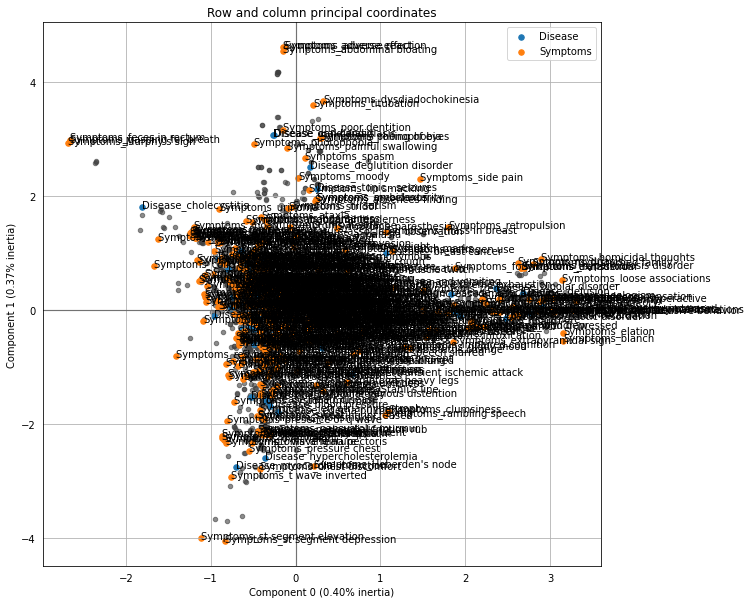

In [ ]:
# plotting 
p= mca2.plot_coordinates(X = new, row_points_size=20, figsize=(10,10), show_column_labels = True);

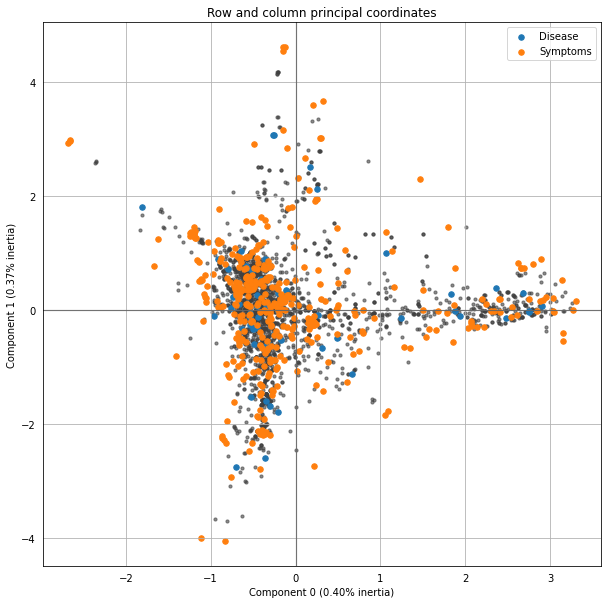

In [ ]:
# plotting 
p= mca2.plot_coordinates(X = new, row_points_size=10, figsize=(10,10), show_column_labels = False);

From both the plot, it's not clear to interpret and analysize as we have multiclass label and figure is vague. One disease have multiple symptoms so figure is unclear, however we can see some grouping of similar symptoms that predict disease are together.

In [ ]:
mca.eigenvalues_

[0.9067345830614689, 0.8464791450587204]

In [ ]:
mca.total_inertia_

229.5

In [ ]:
mca.explained_inertia_

[0.003950913215954113, 0.0036883622878375612]

#### **KModes** 
Performing KModes to cluster categorical variables.

In [ ]:
df= pd.read_csv("combined_dataset.csv")
X = df.drop(['Disease'],axis=1)
y = df.Disease

Implementing Elbow method to check how many clusters to use.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 11079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 11079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 11079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 11079.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 382, cost: 10020.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 109, cost: 10253.0
Init: initializing centroids
Init: initializing clusters
Starting itera

Text(0.5, 1.0, 'Elbow Method For Optimal k')

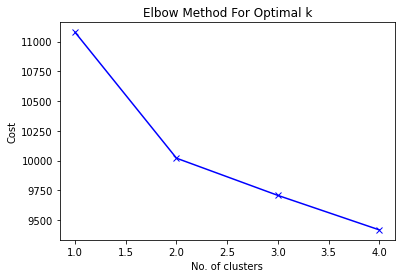

In [ ]:
from kmodes.kmodes import KModes
# Elbow curve to find optimal K
sum_of_dissimilarity = []      #between the clusters
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    sum_of_dissimilarity.append(kmode.cost_)
    
plt.plot(K, sum_of_dissimilarity, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

In [ ]:
# Building the model with 3 clusters 
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 165, cost: 9759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 723, cost: 10071.0
Run 2, iteration: 2/100, moves: 47, cost: 10071.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 202, cost: 9734.0
Run 3, iteration: 2/100, moves: 19, cost: 9734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 746, cost: 9776.0
Run 4, iteration: 2/100, moves: 505, cost: 9612.0
Run 4, iteration: 3/100, moves: 18, cost: 9612.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 474, cost: 9858.0
Best run was number 4


array([0, 1, 1, ..., 0, 1, 2], dtype=uint16)

In [ ]:
#insert the predicted cluster values in our original dataset.
X.insert(0, "Cluster", clusters, True)
X

Cluster                                    Symptoms  Weight  Height  \
0           0                              uncoordination      68     180   
1           1                                       fever      68     170   
2           1                              pleuritic pain      68     162   
3           1                                     snuffle      68     162   
4           1                                 throat sore      68     185   
5           1                                     malaise      68     185   
6           1                                debilitation      68     185   
7           0                                    asthenia      68     185   
8           1                                       chill      68     185   
9           0                             scleral icterus      68     185   
10          1                               nasal flaring      68     188   
11          0                                     dysuria      68     188   
12          2                                lip smacking      68     188   
13          0                                    headache      68     188   
14          2                                       snore      68     188   
15          1                                green sputum      68     188   
16          1                         shortness of breath      68     188   
17          2                        distress respiratory      68     183   
18          1                                    blackout      68     183   
19          1                          extreme exhaustion      68     183   
20          0                               heme positive     140     183   
21          1                              pain abdominal     140     183   
22          0                                    vomiting     140     183   
23          2                              disequilibrium     140     183   
24          0                                      nausea     140     183   
25          0                                intoxication     140     168   
26          0                                 haemorrhage     140     168   
27          1                             guaiac positive     140     186   
28          2                                        pain     140     162   
29          2                       decreased body weight     140     182   
30          0                               sore to touch     140     172   
31          0                                   dizziness     140     159   
32          2                                        pain     685     159   
33          1                                  pain chest     685     171   
34          1                                       sweat     685     162   
35          0                          sweating increased     685     162   
36          2                                   nonsmoker     685     162   
37          2                              pressure chest     685     162   
38          2                                     syncope     685     162   
39          0                                    numbness     685     184   
40          1                            chest discomfort     685     175   
41          2                         shortness of breath     685     175   
42          0                       st segment depression     685     175   
43          2                                       worry     685     175   
44          2                             t wave inverted     685     175   
45          0                                 bradycardia     685     175   
46          0                                     dyspnea     685     175   
47          0                                     seizure     290     175   
48          1                              hypometabolism     290     175   
49          0                                        aura     290     175   
50          0                               muscle twitch     290     175   
51

In [ ]:
y_means = kmode.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 887, cost: 10596.0
Run 1, iteration: 2/100, moves: 158, cost: 10531.0
Run 1, iteration: 3/100, moves: 5, cost: 10531.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 293, cost: 10312.0
Run 2, iteration: 2/100, moves: 44, cost: 10312.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 555, cost: 10554.0
Run 3, iteration: 2/100, moves: 151, cost: 10529.0
Run 3, iteration: 3/100, moves: 2, cost: 10529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 157, cost: 10481.0
Run 4, iteration: 2/100, moves: 12, cost: 10481.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 727, cost: 9687.0
Run 5, iteration: 2/100, moves: 189, cost: 967

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
#X['Age']

In [ ]:
X['Age group'] = pd.qcut(X['Age'],4)
X['Height group'] = pd.qcut(X['Height'],4)
X['Weight group'] = pd.qcut(X['Weight'],4)

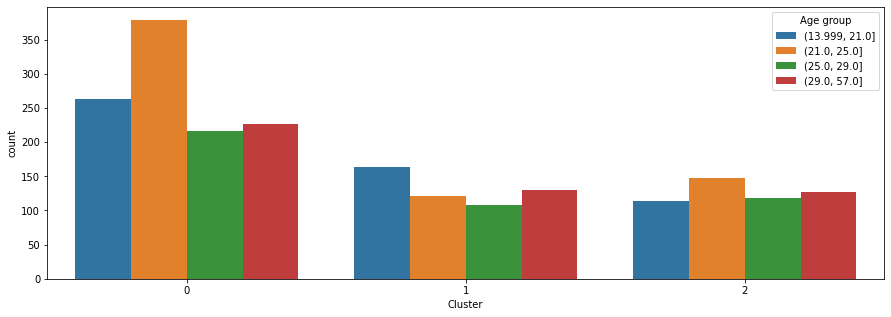

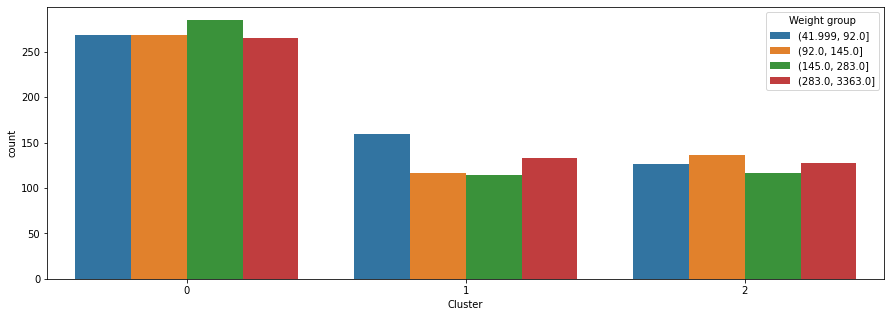

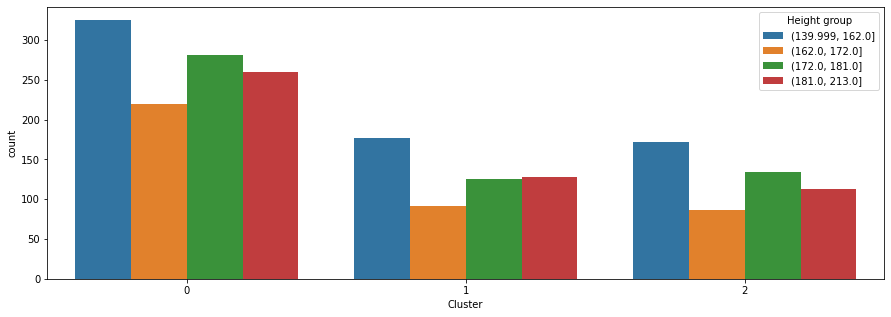

In [ ]:
all_features = ["Age group", "Weight group", "Height group"]

for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = X)
    plt.show()

The above plot shows model building with KModes using three clusters on categorical variables Age, Weight and Height. The method also group the variables as we can see age being group as between 13-21, 21-25, and so forth.

In [ ]:
# performing onehot encoding on variables
categorial_list_OneHot = ['Intensity', 'Severity','Gender']
X_trans =pd.get_dummies(df,columns=categorial_list_OneHot)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 16193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 16193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 16193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 16193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 16193.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 825, cost: 14022.0
Run 1, iteration: 2/100, moves: 36, cost: 14022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 270, cost: 14012.0
Run 2, iteration: 2/1

Text(0.5, 1.0, 'Elbow Method For Optimal k')

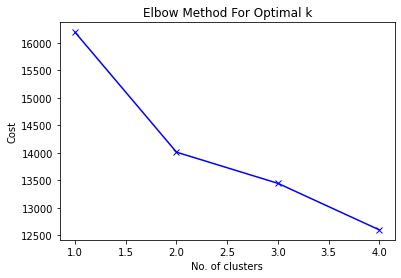

In [ ]:
# Implementing KModes on Symptoms variable to see how sysmptoms are clusters together
from kmodes.kmodes import KModes
# Elbow curve to find optimal K
sum_of_dissimilarity = []      #between the clusters
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X_trans)
    sum_of_dissimilarity.append(kmode.cost_)
    
plt.plot(K, sum_of_dissimilarity, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_trans)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 781, cost: 14043.0
Run 1, iteration: 2/100, moves: 17, cost: 14034.0
Run 1, iteration: 3/100, moves: 1, cost: 14034.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 766, cost: 14063.0
Run 2, iteration: 2/100, moves: 100, cost: 14063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 272, cost: 14012.0
Run 3, iteration: 2/100, moves: 11, cost: 14012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 785, cost: 14013.0
Run 4, iteration: 2/100, moves: 3, cost: 14013.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 36, cost: 14477.0
Best run was number 3


array([0, 1, 1, ..., 0, 1, 1], dtype=uint16)

In [ ]:
# inserting the cluster to our dataset
X_trans.insert(0, "Cluster", clusters, True)
X_trans

Cluster                              Disease  \
0           0                            influenza   
1           1                            influenza   
2           1                            influenza   
3           1                            influenza   
4           1                            influenza   
5           0                            influenza   
6           0                            influenza   
7           1                            influenza   
8           1                            influenza   
9           0                            influenza   
10          1                            influenza   
11          0                            influenza   
12          1                            influenza   
13          1                            influenza   
14          1                            influenza   
15          0                            influenza   
16          1                            influenza   
17          1                            influenza   
18          1                            influenza   
19          0                            influenza   
20          0                            gastritis   
21          1                            gastritis   
22          0                            gastritis   
23          1                            gastritis   
24          0                            gastritis   
25          0                            gastritis   
26          0                            gastritis   
27          1                            gastritis   
28          1                            gastritis   
29          1                            gastritis   
30          0                            gastritis   
31          0                            gastritis   
32          1                 hypercholesterolemia   
33          1                 hypercholesterolemia   
34          1                 hypercholesterolemia   
35          0                 hypercholesterolemia   
36          0                 hypercholesterolemia   
37          1                 hypercholesterolemia   
38          1                 hypercholesterolemia   
39          0                 hypercholesterolemia   
40          0                 hypercholesterolemia   
41          1                 hypercholesterolemia   
42          0                 hypercholesterolemia   
43          1                 hypercholesterolemia   
44          1                 hypercholesterolemia   
45          0                 hypercholesterolemia   
46          0                 hypercholesterolemia   
47          0                        brain disease   
48          1                        brain disease   
49          0                        brain disease   
50          0                        brain disease   
51          1                        brain disease   
52          1                        brain disease   
53          0                        brain disease   
54          1                        brain disease   
55          0                        brain disease   
56          1                        brain disease   
57          0                        brain disease   
58          1                        brain disease   
59          1                        brain disease   
60          1                  insufficiency renal   
61          0                  insufficiency renal   
62          0                  insufficiency renal   
63          0                  insufficiency renal   
64          0                  insufficiency renal   
65          0                  insufficiency renal   
66          1                  insufficiency renal   
67          0                  insufficiency renal   
68          1                  insufficiency renal   
69          0                  insufficiency renal   
70          1                  insufficiency renal   
71          0                  insufficiency renal   
72          1                  insufficiency renal   
73        

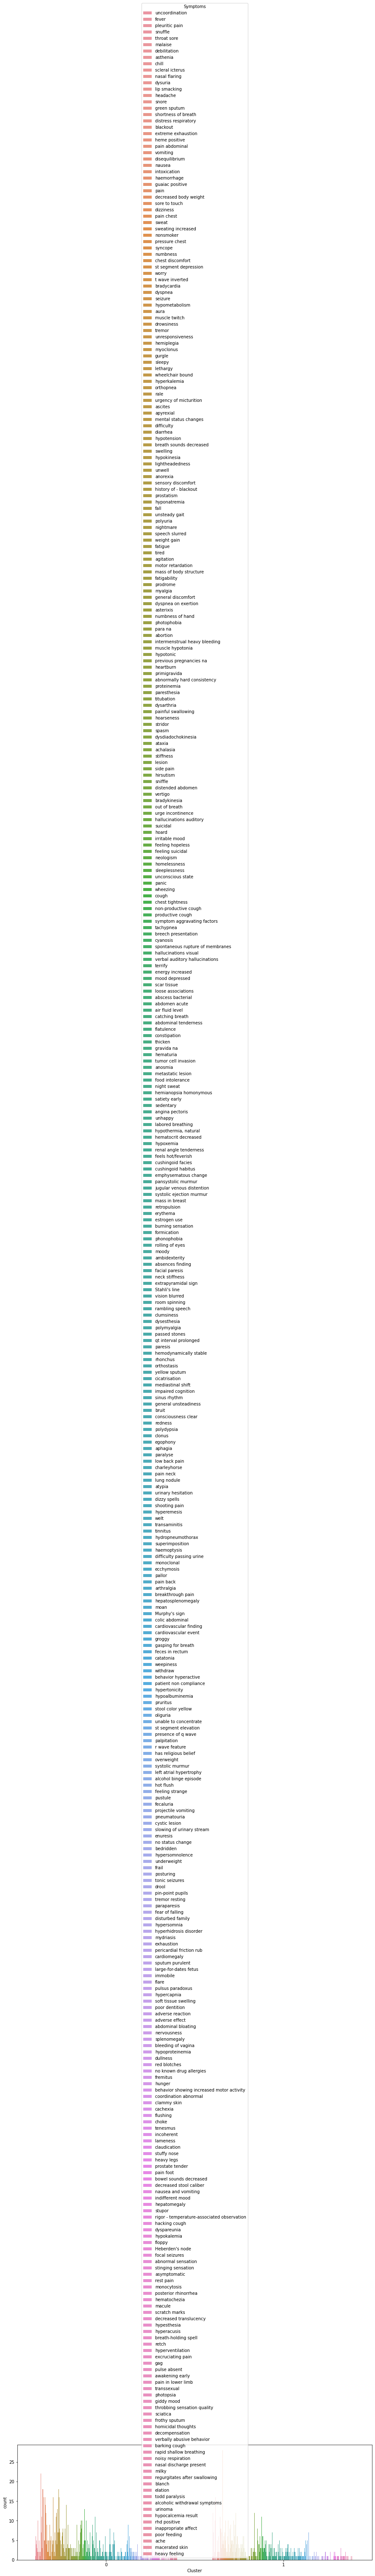

In [ ]:
all_features = ["Symptoms"]
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = X_trans)
    plt.show()

The above plot shows KModes model using 3 clusters on Symptoms variable. As we can see the plot is not redable since we have so many symptoms so it won't be appaling and won't give us accurate results. Thus, we will not use this for further analysis. 

# **Implementing all model building related process**

In [ ]:
new_df = pd.read_csv("combined_dataset.csv") 
# dropping all the insignificant columns
new_df = new_df.drop(['Season'], axis=1)

In [ ]:
new_df.isna().sum()

Disease      0
Symptoms     0
Weight       0
Height       0
Intensity    0
Severity     0
Age          0
Gender       0
dtype: int64

**Features vs target varibales**

In [ ]:
# creating features and target variable
X = new_df.drop(['Disease'],axis=1)
y = new_df.Disease

##### Total unique disease after cleaning and preprocessing

In [ ]:
new_df['Disease'].nunique() #different 

60

##### counting of each disease

In [ ]:
new_df['Disease'].value_counts() #different 

brain disease                          158
heart disease                          138
respiratory disease                     92
Cancer                                  85
lung disease                            78
malignant neoplasms                     69
blood related disease                   64
colon disease                           58
anxiety                                 57
stomach disease                         55
psychotic disorder                      53
diabetes                                53
other                                   50
infection                               50
bipolar disorder                        47
gastritis                               42
liver disease                           42
vien swlling clots                      40
stones in bladder                       39
skin disease                            38
kidney disease                          38
blood pressure                          35
tonic - seizures                        34
hepatitis  

The distribution of the target variables(Disease) is imbalance. Brain and heart disease is highest in number.

### **Imbalance Data** 

Class=35, n=20 (0.946%)
Class=29, n=42 (1.987%)
Class=32, n=15 (0.710%)
Class=12, n=158 (7.474%)
Class=36, n=17 (0.804%)
Class=19, n=17 (0.804%)
Class=33, n=23 (1.088%)
Class=52, n=55 (2.602%)
Class=45, n=50 (2.365%)
Class=18, n=15 (0.710%)
Class=16, n=15 (0.710%)
Class=49, n=92 (4.352%)
Class=34, n=50 (2.365%)
Class=46, n=15 (0.710%)
Class=1, n=85 (4.021%)
Class=43, n=26 (1.230%)
Class=41, n=69 (3.264%)
Class=30, n=138 (6.528%)
Class=0, n=24 (1.135%)
Class=56, n=34 (1.608%)
Class=57, n=17 (0.804%)
Class=26, n=16 (0.757%)
Class=7, n=31 (1.466%)
Class=17, n=58 (2.744%)
Class=5, n=31 (1.466%)
Class=15, n=18 (0.851%)
Class=48, n=53 (2.507%)
Class=11, n=64 (3.027%)
Class=37, n=38 (1.798%)
Class=22, n=21 (0.993%)
Class=42, n=19 (0.899%)
Class=23, n=53 (2.507%)
Class=28, n=14 (0.662%)
Class=58, n=15 (0.710%)
Class=4, n=9 (0.426%)
Class=53, n=39 (1.845%)
Class=9, n=47 (2.223%)
Class=31, n=32 (1.514%)
Class=27, n=16 (0.757%)
Class=3, n=14 (0.662%)
Class=39, n=78 (3.690%)
Class=6, n=57 (2.696%)

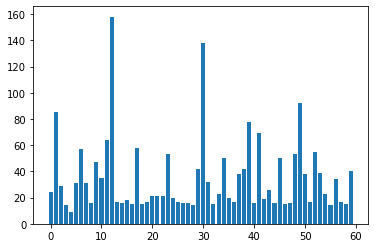

In [ ]:
# label encode the target variable
from collections import Counter
from matplotlib import pyplot
le= preprocessing.LabelEncoder()
le.fit(y)
y = le.fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

From the distribution of each class label of Disease column, we can see disease categories are not balanced. 

In [ ]:
le_name_mapping1 = dict(zip(le.transform(le.classes_), le.classes_))
# creating pickle file to use flask
pickle.dump(le_name_mapping1,open("disease_name.pkl","wb"))

In [ ]:
# list of categorical variables
#from numpy import array
cat_list = X[['Intensity', 'Severity','Symptoms','Gender']]

#### Implementing One hot encoder to create binary features for each categorical variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')
enc = OneHotEncoder(sparse =False)

cat_enc = enc.fit_transform(cat_list)
column_name = enc.get_feature_names_out(['Intensity', 'Severity','Symptoms','Gender'])
enc_df = pd.DataFrame(cat_enc, columns= column_name)

new_X = X.join(enc_df)
new_X

new_X = new_X.drop(['Intensity', 'Severity','Symptoms','Gender'],axis=1)
#print(new_X)


### **Trying to balance dataset using oversampling method** 

Class=35, n=158 (1.667%)
Class=29, n=158 (1.667%)
Class=32, n=158 (1.667%)
Class=12, n=158 (1.667%)
Class=36, n=158 (1.667%)
Class=19, n=158 (1.667%)
Class=33, n=158 (1.667%)
Class=52, n=158 (1.667%)
Class=45, n=158 (1.667%)
Class=18, n=158 (1.667%)
Class=16, n=158 (1.667%)
Class=49, n=158 (1.667%)
Class=34, n=158 (1.667%)
Class=46, n=158 (1.667%)
Class=1, n=158 (1.667%)
Class=43, n=158 (1.667%)
Class=41, n=158 (1.667%)
Class=30, n=158 (1.667%)
Class=0, n=158 (1.667%)
Class=56, n=158 (1.667%)
Class=57, n=158 (1.667%)
Class=26, n=158 (1.667%)
Class=7, n=158 (1.667%)
Class=17, n=158 (1.667%)
Class=5, n=158 (1.667%)
Class=15, n=158 (1.667%)
Class=48, n=158 (1.667%)
Class=11, n=158 (1.667%)
Class=37, n=158 (1.667%)
Class=22, n=158 (1.667%)
Class=42, n=158 (1.667%)
Class=23, n=158 (1.667%)
Class=28, n=158 (1.667%)
Class=58, n=158 (1.667%)
Class=4, n=158 (1.667%)
Class=53, n=158 (1.667%)
Class=9, n=158 (1.667%)
Class=31, n=158 (1.667%)
Class=27, n=158 (1.667%)
Class=3, n=158 (1.667%)
Class=3

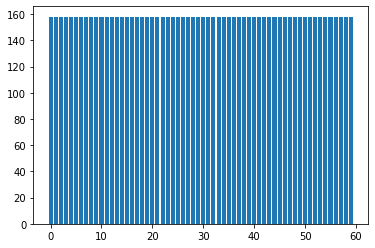

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(new_X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show() #data set being balanced all the dieases have same % now.

We can see each class label of Disease column is balanced now after oversampling the minority class label.

In [ ]:
X_list = X.columns
final_X_list=list(X_list)

# creating a pickle file to use for Flask ( which include list of categorical columns name)
pickle.dump(final_X_list,open("list.pkl","wb"))

### Train and test split
#### Now its time to split our data into a training set and a test set! The 'Disease' variable is the one that we will try to predict.

In [ ]:
X.shape

(9480, 412)

In [ ]:
y.shape

(9480,)

In [ ]:
#Train and Split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55, test_size= 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7584, 412), (1896, 412), (7584,), (1896,))

#### Standardaization of the data (used for numerical data)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# for future analysis
#mapper = DataFrameMapper([
 #   (numeric_list, StandardScaler()),
 #   (categorial_list_OneHot, OneHotEncoder()),
 #   (categorial_list_LabelEncoder, LabelEncoder())  
#])

## **Model building** 

### Helper function

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# helper function to build the model
def model_perf_v1(model,X_train, X_val, y_train, y_val):
    print("Accuracy on training set:")
    pred = model.predict(X_train)
    accuracy_train = (accuracy_score(y_true = y_train, y_pred = pred))
    print(accuracy_train)
    print("Accuracy on testing set:")
    pred_t = model.predict(X_val)
    accuracy_test = (accuracy_score(y_true = y_val, y_pred = pred_t))
    print(accuracy_test)
    return accuracy_train, accuracy_test

In [ ]:
# helper function to create a comparision plot
def plot(dicOne,dicTwo,metricName,label1,label2):
    '''bar plot'''
    x = np.arange(len(dicOne))

    width = 0.3
    metric_name = metricName
    val_dicOne = [v for v in dicOne.values()]
    val_dicTwo = [v for v in dicTwo.values()] #getting values from dictionarys
    plt.ylabel(label1+'-'+label2)
    plt.bar(x - 0.17, val_dicOne, width, label=label1) #adding space
    plt.bar(x + 0.17, val_dicTwo, width, label=label2)

    plt.xticks(ticks=x, labels=dicOne.keys(),
               rotation=45) #rotating ticks as they wont fit properly
    _ = plt.legend()


#### Initiate all the classifier from the sklearn library. Keep all parameters with their default values. ( without specifing anything)

In [ ]:
# intializing empty dictionary
accuracy_test_1={}
accuracy_train_1={}
grid_dict_simple = {0: 'DecisionTree',1: 'RandomForest',2:'GradientBoosting',3:'XGboost'}

In [ ]:
# Building Decision Tree classifier Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_train, accuracy_test= model_perf_v1(dt,X_train,X_test,y_train,y_test)
accuracy_train_1[grid_dict_simple[0]]= accuracy_train
accuracy_test_1[grid_dict_simple[0]]= accuracy_test

Accuracy on training set:
1.0
Accuracy on testing set:
0.9604430379746836


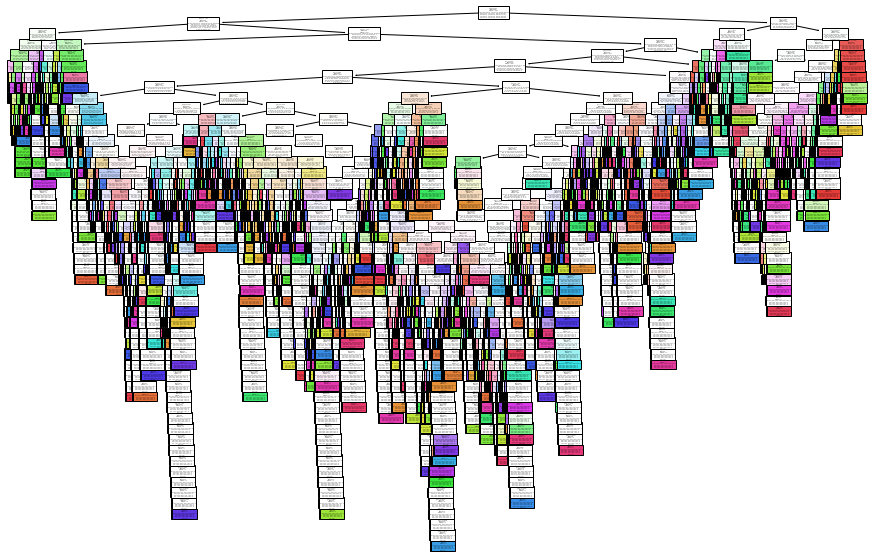

In [ ]:
from sklearn import tree
# plotting the decision tree
fig = plt.figure(figsize = (15,10))
_ = tree.plot_tree(decision_tree = dt, filled = True)

In [ ]:
# Building Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_train, accuracy_test= model_perf_v1(rf,X_train,X_test,y_train,y_test)
accuracy_train_1[grid_dict_simple[1]]= accuracy_train
accuracy_test_1[grid_dict_simple[1]]= accuracy_test

Accuracy on training set:
1.0
Accuracy on testing set:
0.9161392405063291


In [ ]:
# Building Gradient Boost Model
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
accuracy_train, accuracy_test= model_perf_v1(grb,X_train,X_test,y_train,y_test)
accuracy_train_1[grid_dict_simple[2]]= accuracy_train
accuracy_test_1[grid_dict_simple[2]]=accuracy_test

Accuracy on training set:
0.9993407172995781
Accuracy on testing set:
0.8734177215189873


In [ ]:
import xgboost as xgb
# Building XGBoost Model
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train, y_train)
accuracy_train, accuracy_test= model_perf_v1(xg_reg,X_train,X_test,y_train,y_test)
accuracy_train_1[grid_dict_simple[3]]= accuracy_train
accuracy_test_1[grid_dict_simple[3]]=accuracy_test

C:\Users\shivk\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set:
1.0
Accuracy on testing set:
0.9678270042194093


**Comparing the Accuracy of Train and Test set of these models:** 

In [ ]:
accuracy_train_1

{'DecisionTree': 1.0,
 'RandomForest': 1.0,
 'GradientBoosting': 0.9993407172995781,
 'XGboost': 1.0}

In [ ]:
accuracy_test_1

{'DecisionTree': 0.9604430379746836,
 'RandomForest': 0.9161392405063291,
 'GradientBoosting': 0.8734177215189873,
 'XGboost': 0.9678270042194093}

We built our models using Decision Tree Classifier, Random Forest, Gradiant Boosting, and XGBoost method, but XGBoost model gave us the rest accuract compare to other models. 

### **Comparison barplot for default classifiers**

ACCURACY for default classifiers


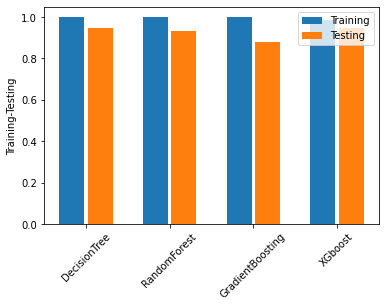

In [ ]:
print("ACCURACY for default classifiers")
plot(accuracy_train_1,accuracy_test_1 ,'Accuracy','Training','Testing')


### **PCA Analysis**

In [ ]:
accuracy_train_pca={}
accuracy_test_pca={}

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train)
print(np.cumsum(pca.explained_variance_ratio_))

[0.00598287 0.01145026 0.01660643 0.0209614  0.02514907 0.02929793
 0.03328716 0.03709962 0.04062252 0.04385697 0.04707038 0.05025095
 0.05337766 0.05649761 0.05960857 0.06270856 0.06577742 0.06883379
 0.07188155 0.07492386 0.07794649 0.08096186 0.0839666  0.08695493
 0.0899332  0.09290831 0.09587614 0.09883616 0.10177976 0.10471479
 0.10764035 0.11056178 0.1134721  0.11637629 0.11927754 0.12217327
 0.12506093 0.12794365 0.13082253 0.13369847 0.13656522 0.13942368
 0.14227822 0.14512711 0.1479686  0.15080382 0.15363286 0.15646089
 0.15928391 0.16210383 0.1649142  0.16772079 0.17052255 0.17332276
 0.1761181  0.17891043 0.18169796 0.1844818  0.18726213 0.19003657
 0.19280674 0.19557339 0.19833756 0.20109849 0.20385444 0.20660267
 0.20935012 0.21209349 0.21483378 0.21756932 0.22030034 0.22302465
 0.22574648 0.22846475 0.23118202 0.23389569 0.23660292 0.23931009
 0.24201426 0.24471006 0.24740257 0.25009126 0.25277702 0.25545911
 0.25814001 0.26081444 0.26348753 0.26615735 0.26882128 0.2714

Text(0, 0.5, 'cumulative explained variance')

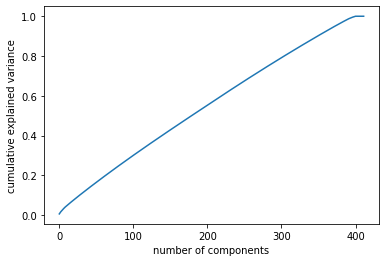

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

From above plot we didnot see clear cutoff point so we are using PCA with 95% variance captured.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.00598287 0.01145026 0.01660643 0.0209614  0.02514907 0.02929793
 0.03328716 0.03709962 0.04062252 0.04385697 0.04707038 0.05025095
 0.05337766 0.05649761 0.05960857 0.06270856 0.06577742 0.06883379
 0.07188155 0.07492386 0.07794649 0.08096186 0.0839666  0.08695493
 0.0899332  0.09290831 0.09587614 0.09883616 0.10177976 0.10471479
 0.10764035 0.11056178 0.1134721  0.11637629 0.11927754 0.12217327
 0.12506093 0.12794365 0.13082253 0.13369847 0.13656522 0.13942368
 0.14227822 0.14512711 0.1479686  0.15080382 0.15363286 0.15646089
 0.15928391 0.16210383 0.1649142  0.16772079 0.17052255 0.17332276
 0.1761181  0.17891043 0.18169796 0.1844818  0.18726213 0.19003657
 0.19280674 0.19557339 0.19833756 0.20109849 0.20385444 0.20660267
 0.20935012 0.21209349 0.21483378 0.21756932 0.22030034 0.22302465
 0.22574648 0.22846475 0.23118202 0.23389569 0.23660292 0.23931009
 0.24201426 0.24471006 0.24740257 0.25009126 0.25277702 0.25545911
 0.25814001 0.26081444 0.26348753 0.26615735 0.26882128 0.2714

In [ ]:
dt = DecisionTreeClassifier()
# fitting the model
dt.fit(X_train_pca, y_train)
accuracy_train, accuracy_test= model_perf_v1(dt,X_train_pca,X_test_pca,y_train,y_test)
accuracy_train_pca[grid_dict_simple[0]]= accuracy_train
accuracy_test_pca[grid_dict_simple[0]]=accuracy_test

Accuracy on training set:
1.0
Accuracy on testing set:
0.5474683544303798


In [ ]:
rf = RandomForestClassifier()
#fitting the model
rf.fit(X_train_pca, y_train)
accuracy_train, accuracy_test= model_perf_v1(rf,X_train_pca,X_test_pca,y_train,y_test)
accuracy_train_pca[grid_dict_simple[1]]= accuracy_train
accuracy_test_pca[grid_dict_simple[1]]=accuracy_test

Accuracy on training set:
1.0
Accuracy on testing set:
0.6529535864978903


### Comparison barplot of classifier using PCA 

ACCURACY for PCA


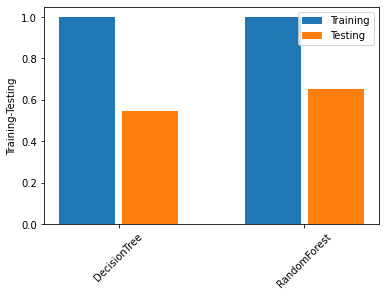

In [ ]:
print("ACCURACY for PCA")
plot(accuracy_train_pca,accuracy_test_pca,'Accuracy','Training','Testing')

PCA is not useful in this dataset, as we have multilabel of disease classes and Symptoms we got after one hotencoding is almost 409 individual columns. We can see Classifier model is not performing using PCA.

### **Performing grid search by hyperparameters tunning**

In [ ]:
# Helper function for grid search
def grid_search_helper():
    
    pipeline1 = Pipeline((
    ('clf', DecisionTreeClassifier()),
    ))

    pipeline2 = Pipeline((
    ('clf', xgb.XGBClassifier()),
    ))
    
    parameters1 = {
    'clf__min_samples_split': [2,3, 5,6], 
    'clf__max_depth': list(range(1,10))
    }

    parameters2 ={
    'clf__n_estimators':[25],
    'clf__max_leaves':[7,8],
    'clf__gamma': [0],
    'clf__max_depth': list(range(5,7))    
    }
     
    pars = [parameters1, parameters2]
    pips = [pipeline1, pipeline2]
    
    print("starting Gridsearch")
    dict_best_params ={}
    for i in range(len(pars)):
        print(pars[i])
        print(pips[i])
        gs = GridSearchCV(pips[i], pars[i], cv= 5, n_jobs=-1)
        gs.fit(X_train, y_train)
        print("finished Gridsearch\n")
        #print(gs.best_estimator_)
        dict_best_params[i]= gs.best_estimator_
    return dict_best_params

In [ ]:
best_params_dict = grid_search_helper()

starting Gridsearch
{'clf__min_samples_split': [2, 3, 5, 6], 'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
Pipeline(steps=(('clf', DecisionTreeClassifier()),))
finished Gridsearch

{'clf__n_estimators': [25], 'clf__max_leaves': [7, 8], 'clf__gamma': [0], 'clf__max_depth': [5, 6]}
Pipeline(steps=(('clf', XGBClassifier()),))
finished Gridsearch



#### **Hyper parameter Tunning for decision tree classification**

In [ ]:
accuracy_train, accuracy_test = model_perf_v1(best_params_dict[0],X_train,X_test,y_train,y_test)

Accuracy on training set:
0.5171413502109705
Accuracy on testing set:
0.505801687763713


#### **Hyper parameter tunning for XGBoost**

In [ ]:
accuracy_train, accuracy_test = model_perf_v1(best_params_dict[1],X_train,X_test,y_train,y_test)

Accuracy on training set:
0.9771888185654009
Accuracy on testing set:
0.9404008438818565


From above performance metrics of all classifier model after hyperparameter tunning, we observe Xgboost is performing better comparision to the decision tree. Xgboost is giving more information about the target variable 'Disease'. The overfitting issue also got resolved.

#### Features importance for XGboost classifier model

In [ ]:
best_params_dict[1].named_steps["clf"].feature_importances_

array([9.18237679e-03, 1.93246128e-03, 1.51224667e-03, 6.25511515e-04,
       6.04106055e-04, 5.60603861e-04, 8.87135335e-04, 6.65420084e-04,
       9.30196256e-04, 1.64021757e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.95681015e-04, 7.83371832e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.18337877e-04, 0.00000000e+00,
       1.34556722e-02, 0.00000000e+00, 1.06172613e-03, 3.94172705e-04,
       4.58581228e-04, 0.00000000e+00, 3.67919536e-04, 0.00000000e+00,
       0.00000000e+00, 6.15590718e-03, 5.52745629e-03, 0.00000000e+00,
       0.00000000e+00, 6.80850295e-04, 0.00000000e+00, 1.70295814e-03,
       0.00000000e+00, 1.74184574e-03, 0.00000000e+00, 1.11425985e-02,
       1.59212609e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.01492815e-02, 0.00000000e+00, 0.00000000e+00, 1.34019041e-03,
       0.00000000e+00, 1.81709754e-03, 5.68796601e-03, 8.04062991e-04,
       0.00000000e+00, 0.00000000e+00, 5.13694191e-04, 4.25385265e-03,
      

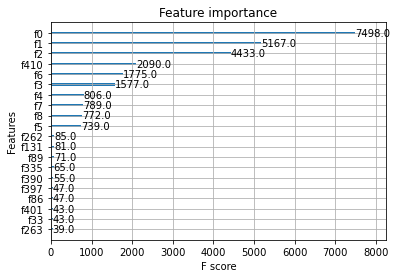

In [ ]:
from xgboost import plot_importance
plot_importance(xg_reg, max_num_features = 20)
pyplot.show()

In [ ]:
listcol = X.columns
listcol[:412]

Index(['Weight', 'Height', 'Age', 'Intensity_high', 'Intensity_low',
       'Intensity_medium', 'Severity_high', 'Severity_low', 'Severity_medium',
       'Symptoms_Heberden's node',
       ...
       'Symptoms_weepiness', 'Symptoms_weight gain', 'Symptoms_welt',
       'Symptoms_wheelchair bound', 'Symptoms_wheezing', 'Symptoms_withdraw',
       'Symptoms_worry', 'Symptoms_yellow sputum', 'Gender_female',
       'Gender_male'],
      dtype='object', length=412)

<AxesSubplot:>

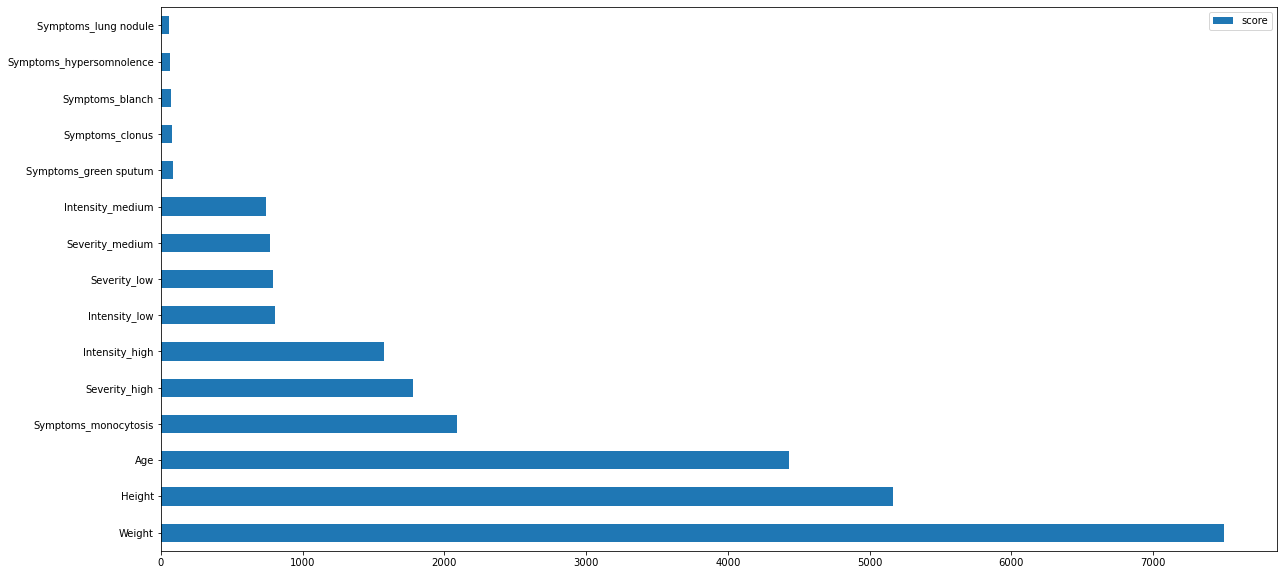

In [ ]:
feature_important = xg_reg.get_booster().get_score(importance_type ='weight')
#keys = list(feature_important.keys())
keys = listcol[:233]
values = list(feature_important.values())
data5 = pd.DataFrame(data= values, index=keys, columns=['score']).sort_values(by="score", ascending =False)
data5.nlargest(15, columns="score").plot(kind='barh', figsize=(20,10))

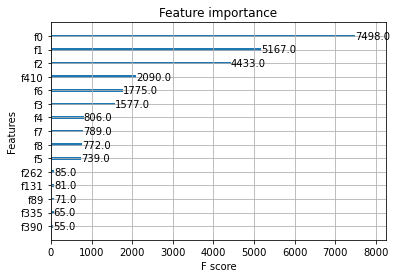

In [ ]:
from xgboost import plot_importance
plot_importance(xg_reg, max_num_features = 15)
pyplot.show()

From feature imporatnce we can see features like age, height, weight, intensity and severity is high comparision to  all symptoms. Thus symptoms is contributing less in comparion to other variables. the symptom that is contributing more is monocytosis.

#### **Conclusion** 

As we can see from the analysis there is enough information to predict disease with high accuracy. Due to the unbalanced nature of the dataset, we need to pay attention to the minority class, i.e. balanced accuracy. By using default classifiers, XGboost and decision tree both were performing well with high accuarcy and little bit of overfitting. Applying grid search helped improve general accuracy, and reduce the overfitting issues but further research is required. Even though default xgboost is also performing better, we will select Xgboost with hyperparameter tunning as a best model.

# Choosing final model as XGBoost(hyparameter), as it gives almost same accuracy 

---

as default parameters but less overfitting of 1%

In [ ]:
pickle.dump(best_params_dict[1], open("final_update_1.pkl", "wb"))

# Flask Poject
Passing the our best model(XGBoost) to Flask.
The Flask framework will help us to send and recieve responses from patients.

**Passing and loading the ML model using Flask's Pickle library**

In [ ]:
#model = pickle.load(open('final_update.pkl', 'rb'))
final_X_list = pickle.load(open('list.pkl', 'rb'))
disease_mapping_names =  pickle.load(open("disease_name.pkl","rb"))
hmodel = pickle.load(open('final_update_1.pkl', 'rb'))

#initilaize the  Flask class with a variable called app
app=Flask(__name__,template_folder='template')
#app = Flask(__name__)

@app.route('/home')
def home():
    
    return render_template('index.html')
    

@app.route('/predict', methods=['POST'])
def predict():
    data1 = request.form['a']
    data2 = request.form['b']
    data3 = request.form['c']
    data4 = request.form['d']
    data5 = request.form['e']
    data6 = request.form['f']
    data7 = request.form['g']
    
    Data = pd.DataFrame({'Age':[data1], 'Gender': [data2], 'Height': [data3], 'Weight': [data4], 'Intensity': [data5],'Severity':[data6], 'Symptoms':[data7]})
    
    #enc = OneHotEncoder(handle_unknown='ignore') 
    
    enc_cat = enc.transform(Data[['Intensity', 'Severity', 'Symptoms', 'Gender']])
    column_names = enc.get_feature_names_out(['Intensity', 'Severity','Symptoms', 'Gender'])
    enc_df = pd.DataFrame(enc_cat, columns= column_names)
    
    df = Data.join(enc_df)
    df = df.drop(['Intensity', 'Severity','Symptoms', 'Gender'],axis=1)
    
    
    for col in final_X_list:
        if col in df.columns:
            print(col)
        else:
            df[col] = 0
    #sc = StandardScaler()
    df = sc.transform(df)
    print(df)
    
    #print(df)
    pred = hmodel.predict(df)
    print(pred)
    
    dis =''
    for key in disease_mapping_names:
        if key == pred[0]:
            dis = disease_mapping_names[key]
            break
             
    return render_template('index.html', data='You may suffer from {}. Please visit to hospital for further diagnosis and take care of yourself.'.format(dis))

if __name__ == "__main__":
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Mar/2022 14:10:50] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [16/Mar/2022 14:10:53] "GET /p HTTP/1.1" 404 -
127.0.0.1 - - [16/Mar/2022 14:10:54] "GET /home HTTP/1.1" 200 -


Weight
Height
Age
Intensity_high
Intensity_low
Intensity_medium
Severity_high
Severity_low
Severity_medium
Symptoms_Heberden's node
Symptoms_Murphy's sign
Symptoms_Stahli's line
Symptoms_abdomen acute
Symptoms_abdominal bloating
Symptoms_abdominal tenderness
Symptoms_abnormal sensation
Symptoms_abnormally hard consistency
Symptoms_abortion
Symptoms_abscess bacterial
Symptoms_absences finding
Symptoms_achalasia
Symptoms_ache
Symptoms_adverse effect
Symptoms_adverse reaction
Symptoms_agitation
Symptoms_air fluid level
Symptoms_alcohol binge episode
Symptoms_alcoholic withdrawal symptoms
Symptoms_ambidexterity
Symptoms_angina pectoris
Symptoms_anorexia
Symptoms_anosmia
Symptoms_aphagia
Symptoms_apyrexial
Symptoms_arthralgia
Symptoms_ascites
Symptoms_asterixis
Symptoms_asthenia
Symptoms_asymptomatic
Symptoms_ataxia
Symptoms_atypia
Symptoms_aura
Symptoms_awakening early
Symptoms_barking cough
Symptoms_bedridden
Symptoms_behavior hyperactive
Symptoms_behavior showing increased motor activity

C:\Users\shivk\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
127.0.0.1 - - [16/Mar/2022 14:11:47] "POST /predict HTTP/1.1" 200 -


[4]


C:\Users\shivk\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
127.0.0.1 - - [16/Mar/2022 14:12:46] "POST /predict HTTP/1.1" 200 -


Weight
Height
Age
Intensity_high
Intensity_low
Intensity_medium
Severity_high
Severity_low
Severity_medium
Symptoms_Heberden's node
Symptoms_Murphy's sign
Symptoms_Stahli's line
Symptoms_abdomen acute
Symptoms_abdominal bloating
Symptoms_abdominal tenderness
Symptoms_abnormal sensation
Symptoms_abnormally hard consistency
Symptoms_abortion
Symptoms_abscess bacterial
Symptoms_absences finding
Symptoms_achalasia
Symptoms_ache
Symptoms_adverse effect
Symptoms_adverse reaction
Symptoms_agitation
Symptoms_air fluid level
Symptoms_alcohol binge episode
Symptoms_alcoholic withdrawal symptoms
Symptoms_ambidexterity
Symptoms_angina pectoris
Symptoms_anorexia
Symptoms_anosmia
Symptoms_aphagia
Symptoms_apyrexial
Symptoms_arthralgia
Symptoms_ascites
Symptoms_asterixis
Symptoms_asthenia
Symptoms_asymptomatic
Symptoms_ataxia
Symptoms_atypia
Symptoms_aura
Symptoms_awakening early
Symptoms_barking cough
Symptoms_bedridden
Symptoms_behavior hyperactive
Symptoms_behavior showing increased motor activity

Thank you!!